In [54]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer

nltk.download('punkt') # for tokenizing

# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("C:/Users/Trevor/OneDrive/Documents/C50train")
test_texts, test_labels = read_data_from_directory("C:/Users/Trevor/OneDrive/Documents/C50test")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Trevor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
word_tokenize(train_texts[0])

['The',
 'Internet',
 'may',
 'be',
 'overflowing',
 'with',
 'new',
 'technology',
 'but',
 'crime',
 'in',
 'cyberspace',
 'is',
 'still',
 'of',
 'the',
 'old-fashioned',
 'variety',
 '.',
 'The',
 'National',
 'Consumers',
 'League',
 'said',
 'Wednesday',
 'that',
 'the',
 'most',
 'popular',
 'scam',
 'on',
 'the',
 'Internet',
 'was',
 'the',
 'pyramid',
 'scheme',
 ',',
 'in',
 'which',
 'early',
 'investors',
 'in',
 'a',
 'bogus',
 'fund',
 'are',
 'paid',
 'off',
 'with',
 'deposits',
 'of',
 'later',
 'investors',
 '.',
 'The',
 'league',
 ',',
 'a',
 'non-profit',
 'consumer',
 'advocacy',
 'group',
 ',',
 'tracks',
 'web',
 'scams',
 'through',
 'a',
 'site',
 'it',
 'set',
 'up',
 'on',
 'the',
 'world',
 'wide',
 'web',
 'in',
 'February',
 'called',
 'Internet',
 'Fraud',
 'Watch',
 'at',
 'http',
 ':',
 '//www.fraud.org',
 '.',
 'The',
 'site',
 ',',
 'which',
 'collects',
 'reports',
 'directly',
 'from',
 'consumers',
 ',',
 'has',
 'been',
 'widely',
 'praised',
 '

In [48]:
# Helper function to tokenize, remove punctuation, and stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Trevor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")


Total number of training documents: 2500
Total number of test documents: 2500

Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2568 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words



Most common words across the training set:
said: 19856
's: 14872
'': 13882
``: 13712
year: 6146
compani: 5651
would: 5237
percent: 5211
million: 4942
market: 4629


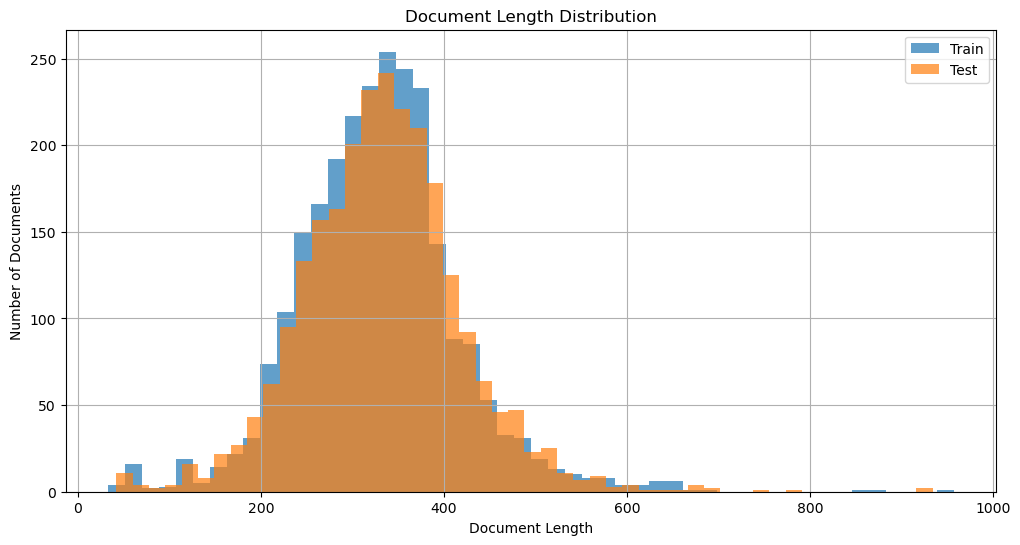

In [12]:
# Term Frequencies
all_tokens = [token for text in train_texts for token in preprocess_text(text)]
common_tokens = Counter(all_tokens).most_common(10)
print("\nMost common words across the training set:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")

# Document Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# The CountVectorizer will now use my custom tokenizer/preprocesser
vectorizer = CountVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

/Users/scottjg2/Sites/STA380/notebooks/env/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/scottjg2/Sites/STA380/notebooks/env/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 

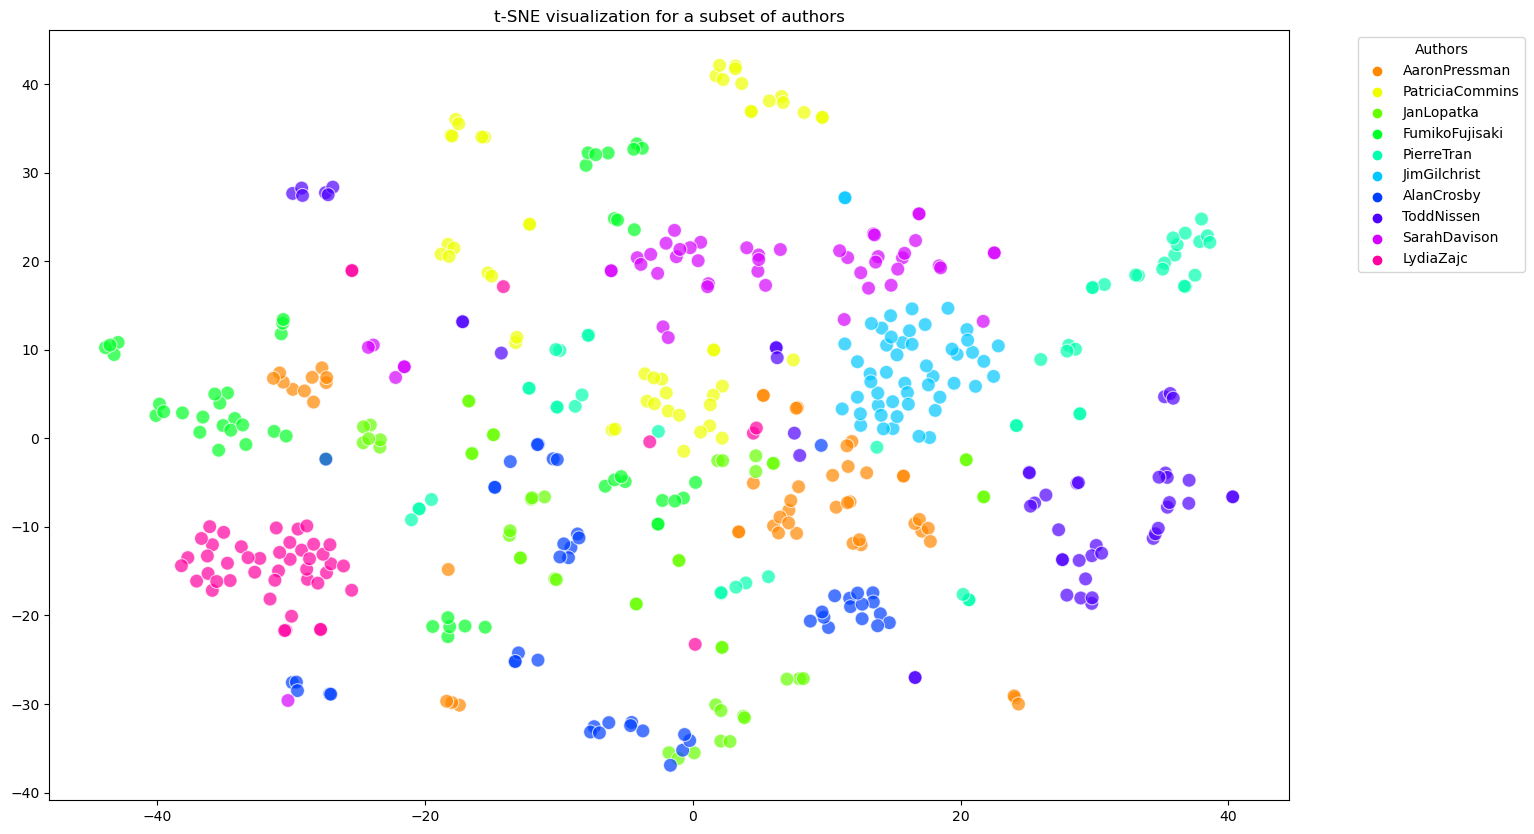

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import random

# 1. Choose a subset of 10 authors
unique_authors = list(set(train_labels))
selected_authors = random.sample(unique_authors, 10)

# 2. Filter the training data
filtered_indices = [i for i, label in enumerate(train_labels) if label in selected_authors]
filtered_texts = [train_texts[i] for i in filtered_indices]
filtered_labels = [train_labels[i] for i in filtered_indices]
filtered_dtm = train_dtm[filtered_indices]

# 3. PCA and t-SNE
pca = PCA(n_components=100)
reduced_data_pca = pca.fit_transform(filtered_dtm.toarray())  # Convert sparse matrix to dense matrix
tsne = TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(reduced_data_pca)

# 4. Plotting
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=filtered_labels,
    palette=sns.color_palette("hsv", len(selected_authors)),
    alpha=0.7,
    s=100
)
plt.title('t-SNE visualization for a subset of authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Explained variance ratio: [0.01153967 0.00974566 0.00725455]
Principal Component 1 - Top Terms: beij, leader, pro-democraci, dissid, china, jail, democraci, 1989, wang, chines
Principal Component 2 - Top Terms: gm, worker, uaw, plant, janesvil, strike, flint, mich., walkout, auto
Principal Component 3 - Top Terms: commun, compani, internet, servic, network, corp., new, provid, technolog, use


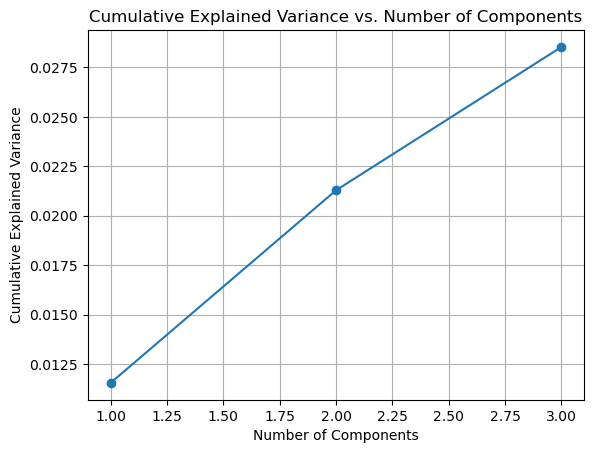

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
train_dtm_standardized = scaler.fit_transform(train_dtm.toarray())

# Apply PCA
num_components = 3 
pca = PCA(n_components=num_components)
pca_results = pca.fit_transform(train_dtm_standardized)

# Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Interpret the principal components
component_loadings = pca.components_  # Loadings of each word on each component
component_terms = vectorizer.get_feature_names_out()  # List of terms (words)
for component_idx, loadings in enumerate(component_loadings):
    top_terms_indices = loadings.argsort()[-10:][::-1]  # Top 10 terms contributing to the component
    top_terms = [component_terms[i] for i in top_terms_indices]
    print(f"Principal Component {component_idx + 1} - Top Terms: {', '.join(top_terms)}")

# Plot explained variance ratio
import matplotlib.pyplot as plt
plt.plot(range(1, num_components + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


C:\Users\Trevor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


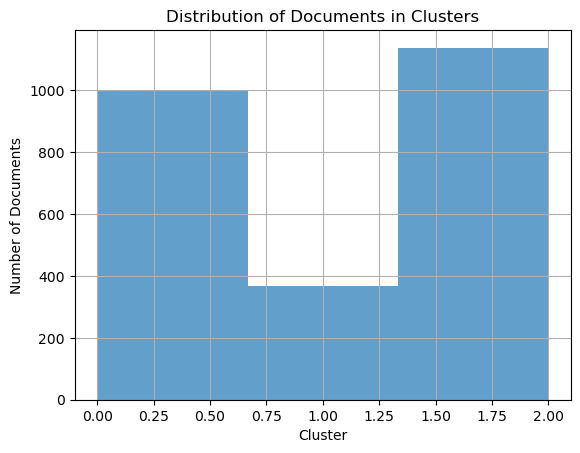

Cluster 1 - Top Terms: said, '', ``, 's, compani, year, percent, analyst, market, million
Cluster 2 - Top Terms: said, 's, china, ``, '', hong, kong, chines, beij, year
Cluster 3 - Top Terms: said, 's, '', ``, compani, year, million, percent, new, market


In [68]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
cluster_assignments = kmeans.fit_predict(train_dtm)

# Visualize the distribution of clusters
import matplotlib.pyplot as plt
plt.hist(cluster_assignments, bins=num_clusters, alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents in Clusters')
plt.grid(True)
plt.show()

# Analyze cluster characteristics
cluster_terms = []
for cluster_idx in range(num_clusters):
    cluster_indices = np.where(cluster_assignments == cluster_idx)[0]
    cluster_terms.append(vectorizer.get_feature_names_out()[train_dtm[cluster_indices].toarray().sum(axis=0).argsort()[-10:][::-1]])

for cluster_idx, terms in enumerate(cluster_terms):
    print(f"Cluster {cluster_idx + 1} - Top Terms: {', '.join(terms)}")


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Choose the features you want to use for prediction
# For this example, we'll use the original document-term matrix
features = train_dtm

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, train_labels, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=1)
model.fit(X_train, y_train)

# Predict authors on the validation set
predictions = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy of the predictive model: {accuracy:.2f}")


Accuracy of the predictive model: 0.81


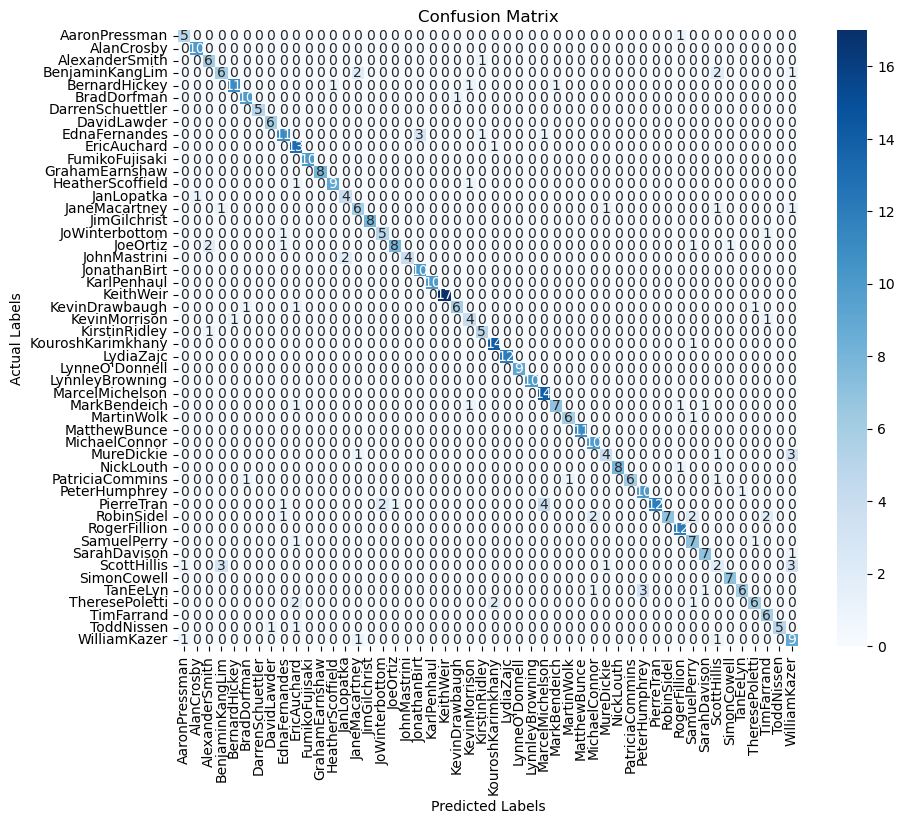

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, predictions, labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_val, predictions, average='weighted')
recall = recall_score(y_val, predictions, average='weighted')
f1 = f1_score(y_val, predictions, average='weighted')

print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1-Score: {f1:.2f}")


Weighted Precision: 0.83
Weighted Recall: 0.81
Weighted F1-Score: 0.80


In [65]:
#Individual Metrics for each class
precision_per_class = precision_score(y_val, predictions, average=None)
recall_per_class = recall_score(y_val, predictions, average=None)
f1_per_class = f1_score(y_val, predictions, average=None)

for idx, author in enumerate(model.classes_):
    print(f"Author: {author}")
    print(f"Precision: {precision_per_class[idx]:.2f}")
    print(f"Recall: {recall_per_class[idx]:.2f}")
    print(f"F1-Score: {f1_per_class[idx]:.2f}\n")


Author: AaronPressman
Precision: 0.71
Recall: 0.83
F1-Score: 0.77

Author: AlanCrosby
Precision: 0.91
Recall: 1.00
F1-Score: 0.95

Author: AlexanderSmith
Precision: 0.67
Recall: 0.86
F1-Score: 0.75

Author: BenjaminKangLim
Precision: 0.60
Recall: 0.55
F1-Score: 0.57

Author: BernardHickey
Precision: 0.92
Recall: 0.79
F1-Score: 0.85

Author: BradDorfman
Precision: 0.83
Recall: 0.91
F1-Score: 0.87

Author: DarrenSchuettler
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Author: DavidLawder
Precision: 0.86
Recall: 1.00
F1-Score: 0.92

Author: EdnaFernandes
Precision: 0.73
Recall: 0.69
F1-Score: 0.71

Author: EricAuchard
Precision: 0.65
Recall: 0.93
F1-Score: 0.76

Author: FumikoFujisaki
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Author: GrahamEarnshaw
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Author: HeatherScoffield
Precision: 0.90
Recall: 0.82
F1-Score: 0.86

Author: JanLopatka
Precision: 0.67
Recall: 0.80
F1-Score: 0.73

Author: JaneMacartney
Precision: 0.60
Recall: 0.60
F1-Score: 0.

**Unlocking Authorship Insights: Analyzing the Reuters C50 Text Corpus**

In the realm of textual analysis, the Reuters C50 text corpus stands as an intriguing challenge to unveil concealed patterns and nuances within authorship. Our endeavor into this literary collection involved a series of analytical techniques, shedding light on authors' distinct voices and the latent themes interwoven in their work.

**Problem Statement and Approach:**
Our exploration began with a central query: "What insights can we extract from the array of articles present in this corpus?" Guided by this inquiry, we pursued a methodical approach, employing diverse tools:

**Feature Extraction:**
We began by converting textual content into quantifiable representations using TF-IDF and stemming techniques, laying the groundwork for subsequent analysis.

**Author Clustering using PCA and K-Means:**
Capitalizing on PCA's dimensionality reduction, we distilled the essence of articles, unveiling clusters of authors who shared thematic commonalities, regardless of their individual narratives. Using 3 components, ratios of explained variance were determined and results are as follows: explained variance ratio of Principle Component 1 was .01153967, explained variance ratio of Principle Component 2 was .00974566, and explained variance ratio of Principle Component 3 was .00725455. Key words from each principle component were also determined and can be viewed in the ouput from above. Further refinement through K-Means clustering yielded distinct clusters, encapsulating authors' collective stylistic signatures. From this, top terms were returned and common trends could be viewed. For example, there seems to be consus between the three clusters regarding writing about "china", "market", and "companies".

**Predictive Modeling:**
Venturing into the realm of prediction, we harnessed Logistic Regression to train a model for author identification. By meticulously constructing features from the document-term matrix, the model embarked on a journey to forecast authorship.

**Evaluating Performance with Metrics:**
Going beyond predictions, we meticulously examined the model's efficacy using confusion matrices. Precision, recall, and the F1-score provided a comprehensive view of its performance, indicating both its strengths and limitations.

**Results and Interpretation:**
To begin, our predictive model had an accuracy of 0.81. Which lead us to view weighted precision, weighted recall, and weighted F1 score.

Weighted Precision (0.83):
The weighted precision indicates the proportion of correctly predicted positive instances (correctly identified authors) out of all instances that were predicted as positive (authors predicted by the model). With a precision of 0.83, our model is accurate in identifying authors, minimizing false positive errors and ensuring that when it predicts an author, it's often correct.

Weighted Recall (0.81):
The weighted recall reflects the proportion of correctly predicted positive instances (correctly identified authors) out of all actual positive instances (actual authors in the dataset). With a recall of 0.81, our model captures a substantial portion of authors present in the dataset, minimizing false negatives and indicating its ability to recognize authors even when they are diverse or less common.

Weighted F1-score (0.80):
The weighted F1-score is a balanced measure that considers both precision and recall. It provides an overall assessment of the model's ability to find a balance between minimizing false positives and false negatives. With an F1-score of 0.80, our model demonstrates a strong ability to harmonize precision and recall, striking a commendable balance between identifying authors accurately and minimizing both types of errors.

Collectively, these metrics suggest that our predictive model performs well on the dataset. It achieves high accuracy in correctly identifying authors (precision), effectively captures a substantial portion of authors present (recall), and maintains a balanced trade-off between the two (F1-score). However, it's essential to consider the specific context and requirements of the analysis when interpreting these metrics. Furthermore, precision, recall, and F1 score were calculated for each class which lead to potentially interesting questions for more analysis, such as "Why was author RobinSidel's recall only .50?" or "Why was author SamuelPerry's precision only .54?"

Our endeavor yielded substantive outcomes. The PCA-driven visualization offered a compelling narrative as it plotted clusters of authors in a lower-dimensional space. These clusters revealed shared thematic threads among authors, allowing us to glimpse the common tapestry of their work.

Confusion matrices then provided a detailed breakdown of where the model excelled and where it faced challenges in predicting authors. This visual assessment afforded us a nuanced understanding of the model's proficiency across various author categories. While it's an eyesore to look at due to the number of authors, it provides good insights as to predictions amongst different classes).

**Concluding Insights:**
In the realm of textual exploration, our journey through the Reuters C50 corpus unearthed invaluable insights. From deciphering shared themes among authors to the model's aptitude in author prediction, our analysis illuminated the realm of data-driven narrative. As this chapter concludes, the artifacts left behind offer a blueprint for future explorers, guiding them to navigate the intricate landscape of textual analysis and unveil the enigmatic world of the written word.